In [1]:
# RCB Vs KKR  Match IPL Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


C:\Users\vr00574274\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the DataSets
data = pd.read_csv('C:\\Users\\vr00574274\\Desktop\\IPL\\matches.csv')
deliveries = pd.read_csv('C:\\Users\\vr00574274\\Desktop\\IPL\\deliveries.csv')
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [5]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

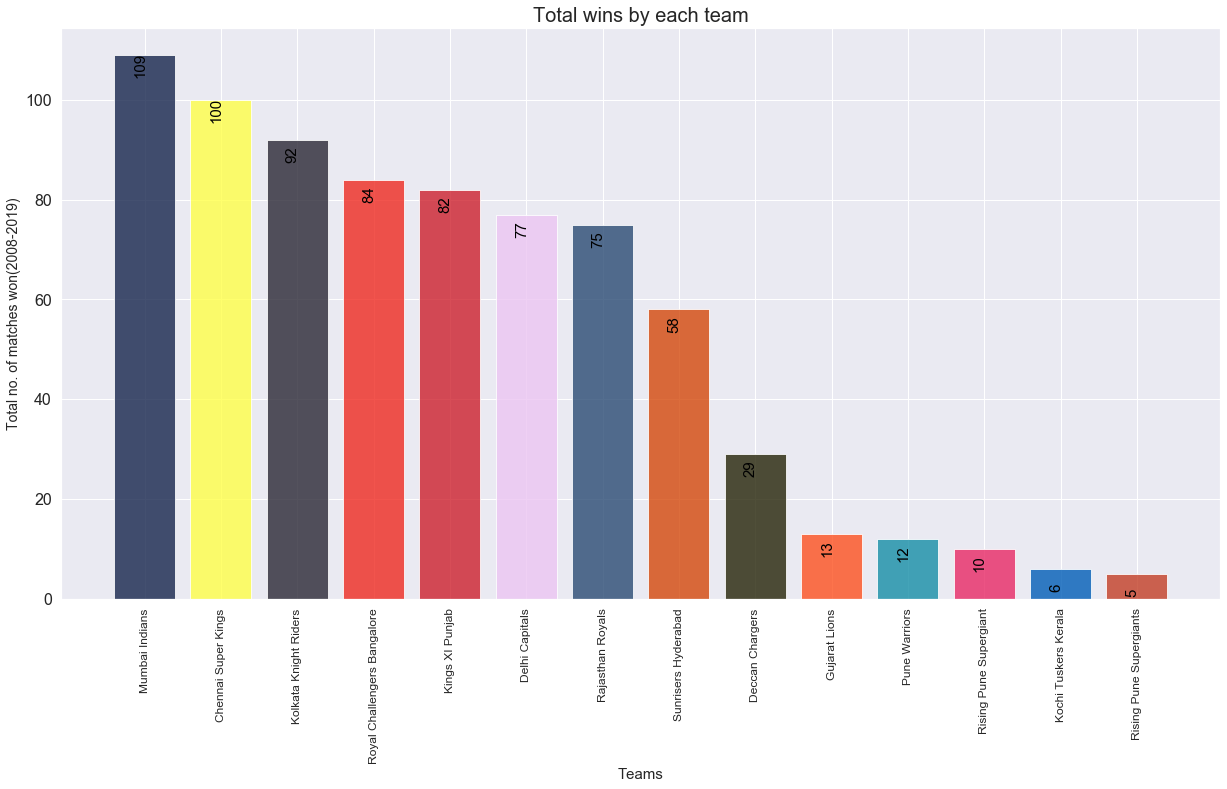

In [6]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

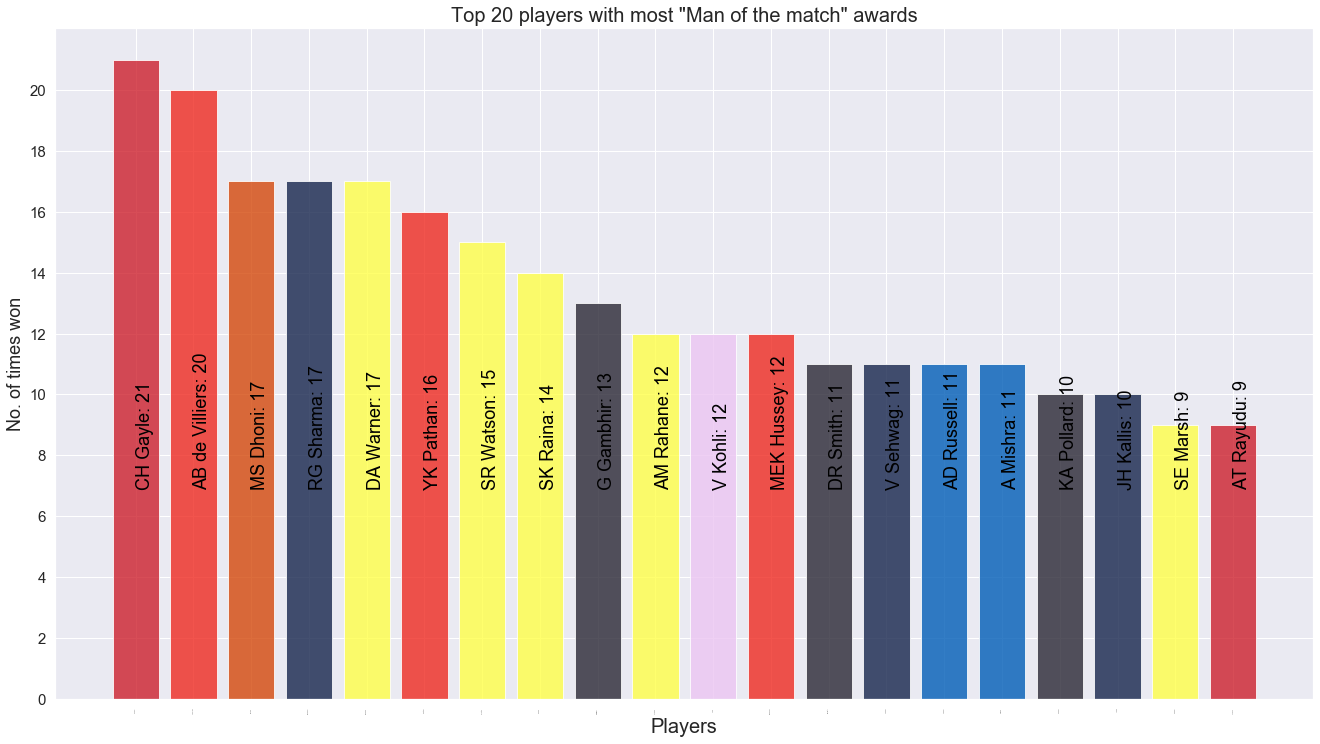

In [7]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [8]:
# Eliminating redundancy

data.loc[data['city']=='Bengaluru','city']='Bangalore'

# Most Runs in KKR Teams against RCB Team

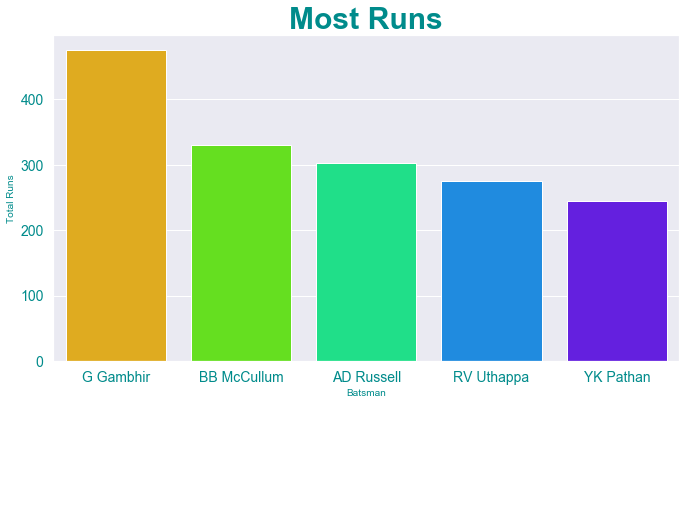

In [82]:
#Create new dataframe
most_runs = pd.DataFrame()

KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = KKR_Runs.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# Gautam Gambhir is Run getter against RCB

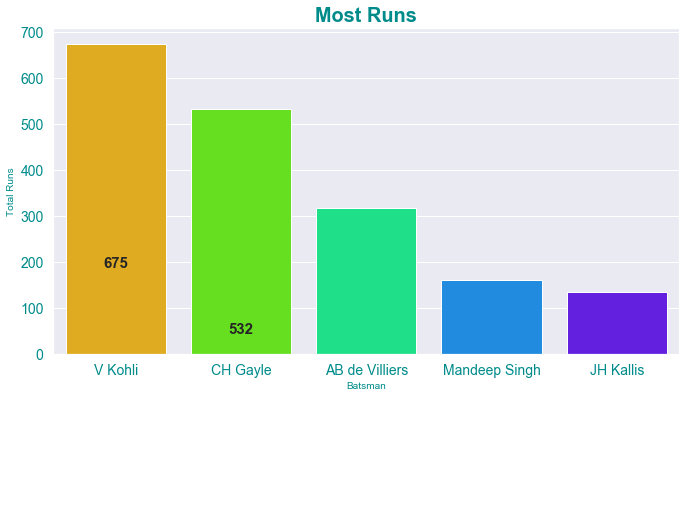

In [83]:
#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
RCB_Runs = deliveries[(deliveries['bowling_team']=='Kolkata Knight Riders') & (deliveries['batting_team']=='Royal Challengers Bangalore') ]

# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = RCB_Runs.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 20,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# V Kholi having highest Run Scorrer against KKR

In [9]:
# Filter the Data only for RCB & KKR
midc=data[np.logical_or(np.logical_and(data['team1']=='Royal Challengers Bangalore',data['team2']=='Kolkata Knight Riders'),np.logical_and(data['team2']=='Royal Challengers Bangalore',data['team1']=='Kolkata Knight Riders'))]

In [87]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [88]:
# Combined for RCB & KKR
Rcbkkr= deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Royal Challengers Bangalore',deliveries['bowling_team']=='Kolkata Knight Riders'),np.logical_and(deliveries['bowling_team']=='Royal Challengers Bangalore',deliveries['batting_team']=='Kolkata Knight Riders'))]

In [91]:
# Check for any Duplicate Rows
duplicate = Rcbkkr[Rcbkkr.duplicated()]
duplicate

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder]
Index: []

[0 rows x 21 columns]

In [92]:
#the top Ten blower of RCB & KKR

#Create new dataframe
wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = Rcbkkr[(Rcbkkr['player_dismissed'].notnull()) & (~Rcbkkr['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(10)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-15), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)


In [10]:
# Checking for any Null Values
midc.loc[midc.isnull().values]
# Umpire 3 it Seems to be Redudant so dropping the Columns umpire3
midc=midc.iloc[:,:-1]
# After Dropping Check any Null Values present in DF
midc.isnull().values.any()

False

In [11]:
midc['winner'].value_counts()

Kolkata Knight Riders          14
Royal Challengers Bangalore    10
Name: winner, dtype: int64

In [13]:
# RCB VS KKR head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(midc['winner'],order=midc['winner'].value_counts().index)
#plt.text(0.9,9,str(midc['winner'].value_counts()['Delhi Capitals']),size=29,color='white')
#plt.text(0.9,9,str(midc['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('RCB vs KKR - head to head')
plt.show()

# In Head 2 Head KKR has won more Matches

In [15]:
# Toss decision statistics for all RCB v KKR matches - Venue wise
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8.5,8)
sns.countplot(midc['toss_decision'],order=midc['toss_decision'].value_counts().index,palette='Set2',hue=midc['winner'])
plt.title('Toss decision at in RCB v KKR matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Toss Decision',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

In [16]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            


In [17]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Royal Challengers Bangalore
field_count = 32
bat_count = 9
Win %age if fielding is choosen = 78.04878048780488
Win %age if batting is choosen = 21.951219512195124




In [18]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Kolkata Knight Riders
field_count = 38
bat_count = 15
Win %age if fielding is choosen = 71.69811320754717
Win %age if batting is choosen = 28.30188679245283




# Teams winning the Toss & fielding First Chances of Winning the Match

In [21]:
deliveries['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [64]:
# Check for Dinesh Karthik Score In the Match with Each and Every Team
RS_Sh_Score=deliveries.loc[deliveries['batsman']=='KD Karthik']
Total_Match_RS_Sharma=RS_Sh_Score['match_id'].nunique()
Total_Runs_RS_Sharma=RS_Sh_Score['batsman_runs'].sum()
Average_Score_RH_Sharma= Total_Runs_RS_Sharma /  Total_Match_RS_Sharma
print('Average Score of Dinesh Karthik with All teams is',Average_Score_RH_Sharma )

Average Score of Dinesh Karthik with All teams is 22.765432098765434


In [65]:
# Check for batsman runs
RS_Sh_Score['batsman_runs'].isnull().values.any()

# Check for match ID
RS_Sh_Score['match_id'].isnull().values.any()

False

In [66]:
# Check for Dinesh Karthik Score In the Match with RCB
RS_Sh_Score_DC=deliveries.loc[(deliveries['batsman']=='KD Karthik') & (deliveries['bowling_team']=='Royal Challengers Bangalore') ]
Total_Match_RS_Sharma_DC=RS_Sh_Score_DC['match_id'].nunique()
Total_Runs_RS_Sharma_DC=RS_Sh_Score_DC['batsman_runs'].sum()
Average_Score_RH_Sharma_DC= Total_Runs_RS_Sharma_DC /  Total_Match_RS_Sharma_DC
print('Average Score of Dinesh Karthik with All teams is',Average_Score_RH_Sharma_DC )

Average Score of Dinesh Karthik with All teams is 20.95


In [67]:
# Analysis say that Dinesh Karthik Average Score is around 27 & 29.92 respectively
Cumm_Avrage= ( Average_Score_RH_Sharma +  Average_Score_RH_Sharma_DC)/2
print('Cumm Average Score of Dinesh Karthik in this Match will be ',Cumm_Avrage )

Cumm Average Score of Dinesh Karthik in this Match will be  21.857716049382717


In [25]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [165]:
deliveries['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [169]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

# No of 4's by Virat Kohli

In [72]:
# No of 4's by Virat against all Teams
Virat_kholi=deliveries[(deliveries['batsman']=='V Kohli')  ]
Virat_Kholi_4s=deliveries[(deliveries['batsman']=='V Kohli')  & ( deliveries['batsman_runs'] ==4) ]
Virat_Kholi_matches=Virat_kholi['match_id'].nunique()
Total_Kholi_4s=Virat_Kholi_4s['batsman_runs'].count()
Average_4s=    Total_Kholi_4s / Virat_Kholi_matches 
print('Average 4ss drwan by Virat kohli with All teams is', Average_4s)

169
482
Average 4ss of Virat kohli with All teams is 2.8520710059171597


In [73]:
# No of 4's against KKR
Virat_kholi=deliveries[(deliveries['batsman']=='V Kohli') & (deliveries['bowling_team']=='Kolkata Knight Riders') ]
Virat_Kholi_4s=Virat_kholi[(Virat_kholi['batsman']=='V Kohli')  & ( Virat_kholi['batsman_runs'] ==4) ]
Virat_Kholi_matches=Virat_kholi['match_id'].nunique()
Total_Kholi_4s=Virat_Kholi_4s['batsman_runs'].count()
Average_4s=    Total_Kholi_4s / Virat_Kholi_matches 
print('Average 4ss drwan by Virat kohli with All teams is', Average_4s)

Average 4ss drwan by Virat kohli with All teams is 2.761904761904762


# Average 4's Hit by Virat Kohli against KKR is 3

# NoBall in Total Match

In [191]:
# TOtal Noball RUns till now as of Date in Data
deliveries['noball_runs'].sum()


6576

In [60]:

# Check for any Null values
Wide_Runs_M['noball_runs'].isnull().values.any()
# Check for any Null values
Wide_Runs_D['noball_runs'].isnull().values.any()
Wide_Runs_M=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') ]
Wide_Runs_D = deliveries[(deliveries['bowling_team']=='Kolkata Knight Riders') ]
Total_Wide_M=Wide_Runs_M.loc[Wide_Runs_M['noball_runs'].isin(['1','2','3','4','5'])]
Total_Wide_D=Wide_Runs_D.loc[Wide_Runs_D['noball_runs'].isin(['1','2','3','4','5'])]
Total_matches_M =Wide_Runs_M['match_id'].nunique()
Total_matches_D =Wide_Runs_D['match_id'].nunique()
Total_Wide_M1=Total_Wide_M['noball_runs'].count()
Total_Wide_D1=Total_Wide_D['noball_runs'].count()

Average_Wide_of_M_team =  Total_Wide_M1 /  Total_matches_M

Average_Wide_of_D_team =  Total_Wide_D1 /  Total_matches_D

print('Average NoBall of Royal Challengers Bangalore team',round(Average_Wide_of_M_team,2 ))
print('Average NoBall of KKR team',round(Average_Wide_of_D_team,2) )

Average NoBall of Royal Challengers Bangalore team 0.51
Average NoBall of KKR team 0.43


In [62]:
# NoBall Against Each other KKR & RCB
Wide_Runs_M=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
Wide_Runs_D = deliveries[(deliveries['bowling_team']=='Kolkata Knight Riders') & (deliveries['batting_team']=='Royal Challengers Bangalore') ]

# Check for any Null values
Wide_Runs_M['noball_runs'].isnull().values.any()
# Check for any Null values
Wide_Runs_D['noball_runs'].isnull().values.any()
Total_Wide_M=Wide_Runs_M.loc[Wide_Runs_M['noball_runs'].isin(['1','2','3','4','5'])]
Total_Wide_D=Wide_Runs_D.loc[Wide_Runs_D['noball_runs'].isin(['1','2','3','4','5'])]
Total_matches_M =Wide_Runs_M['match_id'].nunique()
Total_matches_D =Wide_Runs_D['match_id'].nunique()
Total_Wide_M1=Total_Wide_M['noball_runs'].count()
Total_Wide_D1=Total_Wide_D['noball_runs'].count()
Average_Wide_of_M_team =  Total_Wide_M1 /  Total_matches_M

Average_Wide_of_D_team =  Total_Wide_D1 /  Total_matches_D

print('Average NoBall of Royal Challengers Bangalore team',Average_Wide_of_M_team )
print('Average NoBall of Kolkata Knight Riders team',Average_Wide_of_D_team )

Average NoBall of Royal Challengers Bangalore team 0.375
Average NoBall of Kolkata Knight Riders team 0.5833333333333334


In [226]:
# Average Noball of Royal Challengers Bangalore against KKR is 1
# Aevrage NoBall of KKR against RCB is 1
# total Noball can be around 2